<a href="https://colab.research.google.com/github/aleanaliaaustral-web/labo2025v/blob/main/Arbol%20gridsearch%20consolidado_sin%20semilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================
# Árbol de Regresión: Predecir ganancia_test
# Dataset Consolidado con 10 grupos SIN SEMILLA
============================================

In [1]:
# IMPORTANTE: Primero ejecuta esto en una celda de Python en Colab:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,805102,43.0,1454460,77.7,1454460,77.7
Vcells,1524852,11.7,8388608,64.0,5824560,44.5


ÁRBOL DE REGRESIÓN - GRID SEARCH CONSOLIDADO
SIN SEMILLA
Archivo: Consolidado gridsearch final_csv.csv 

Buscando archivo...
  Probando: /content/buckets/b1/datasets/Consolidado gridsearch final_csv.csv ... ✗
  Probando: /content/datasets/Consolidado gridsearch final_csv.csv ... ✗
  Probando: /content/drive/MyDrive/labo1/datasets/Consolidado gridsearch final_csv.csv ... ✓ ENCONTRADO

Dataset leído correctamente desde:
   /content/drive/MyDrive/labo1/datasets/Consolidado gridsearch final_csv.csv 

Dimensiones: 14473 filas x 7 columnas

Columnas encontradas:
[1] "semilla"       "cp"            "maxdepth"      "minsplit"     
[5] "minbucket"     "ganancia_test" "Grupo"        

Primeras filas del dataset:
   semilla    cp maxdepth minsplit minbucket ganancia_test Grupo
    <char> <num>    <int>    <num>     <int>         <num> <int>
1:  500009  -1.0       14       30        20      27730000     1
2:  500009  -0.5       14       30        20      27730000     1
3:  500009  -1.0       14   

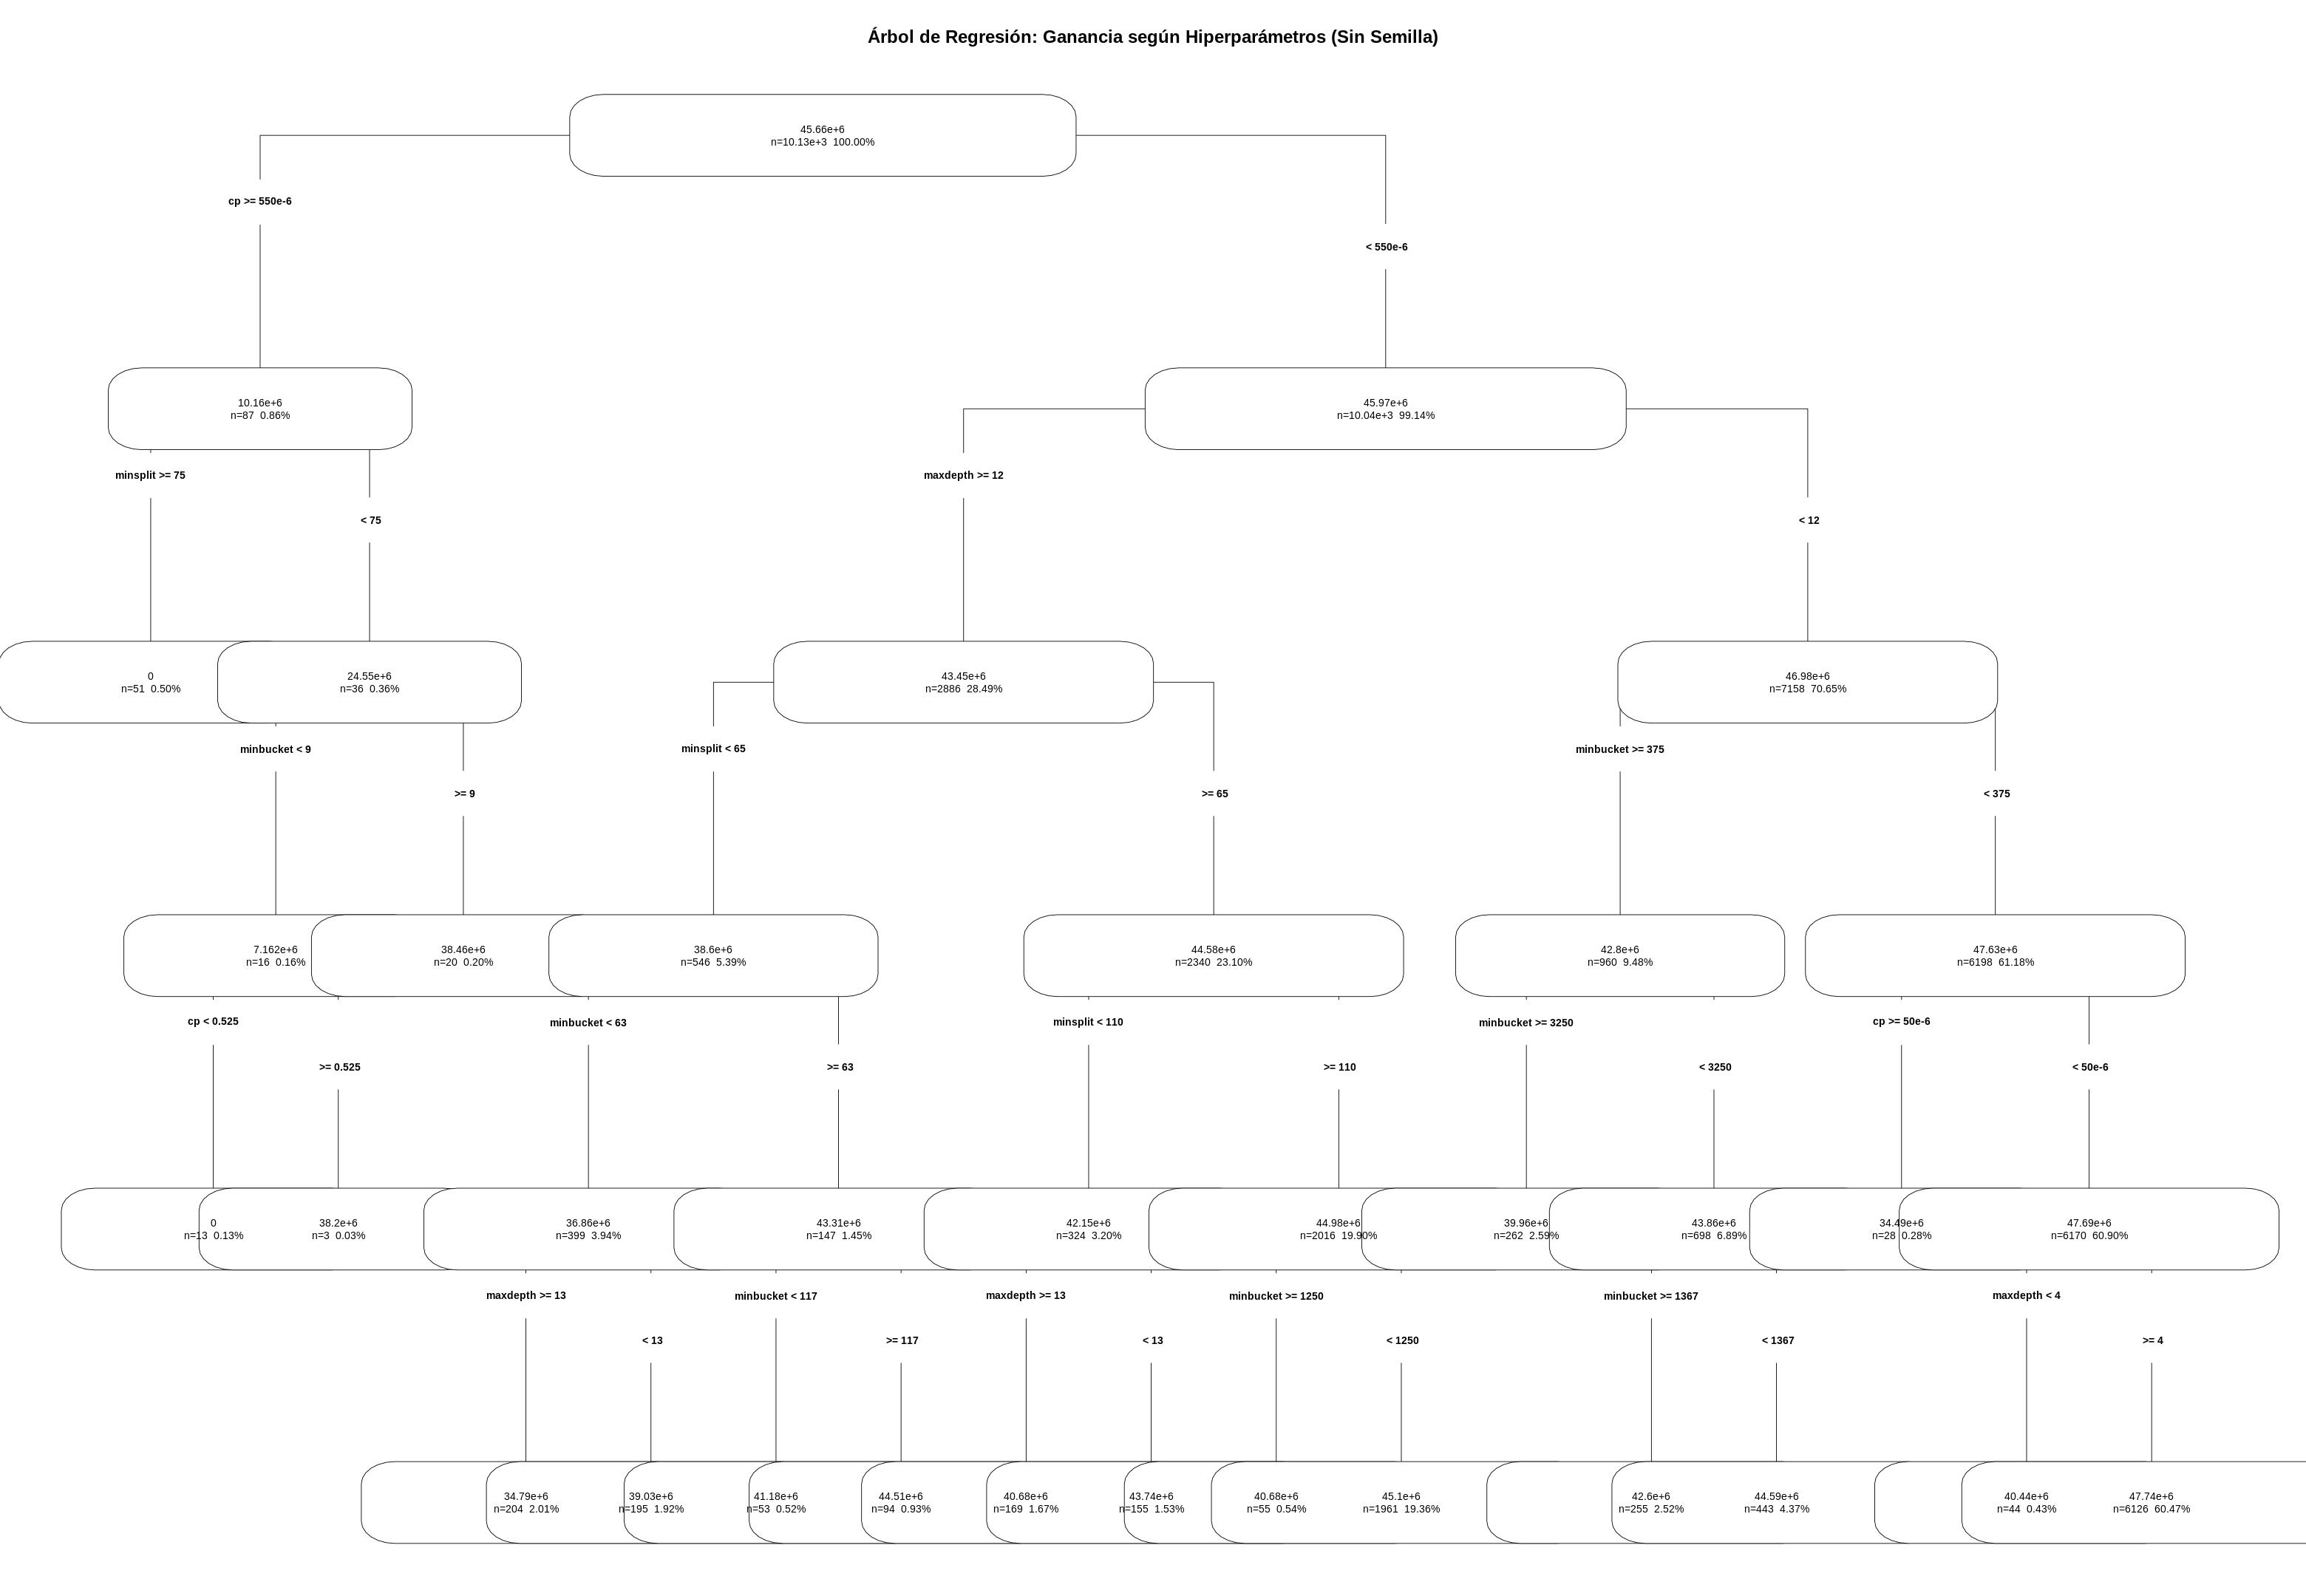


ANÁLISIS DE CONFIGURACIONES

TOP 10 MEJORES (datos reales):
    semilla    cp maxdepth minsplit minbucket ganancia_test Grupo
     <char> <num>    <int>    <num>     <int>         <num> <int>
 1:  304879 -0.10        8      200        30      58870000    10
 2:  304879 -0.05        8      200        30      58870000    10
 3:  304879 -0.01        8      200        30      58870000    10
 4:  304879 -0.10        8      400        30      58760000    10
 5:  304879 -0.05        8      400        30      58760000    10
 6:  304879 -0.01        8      400        30      58760000    10
 7:  304879 -0.10       10      400         5      58510000    10
 8:  304879 -0.05       10      400         5      58510000    10
 9:  304879 -0.01       10      400         5      58510000    10
10:  304879 -0.10        8      200        20      58140000    10


¡ANÁLISIS COMPLETADO!
Cada vez que corras este código obtendrás
una partición train/test diferente y
potencialmente un árbol diferente.


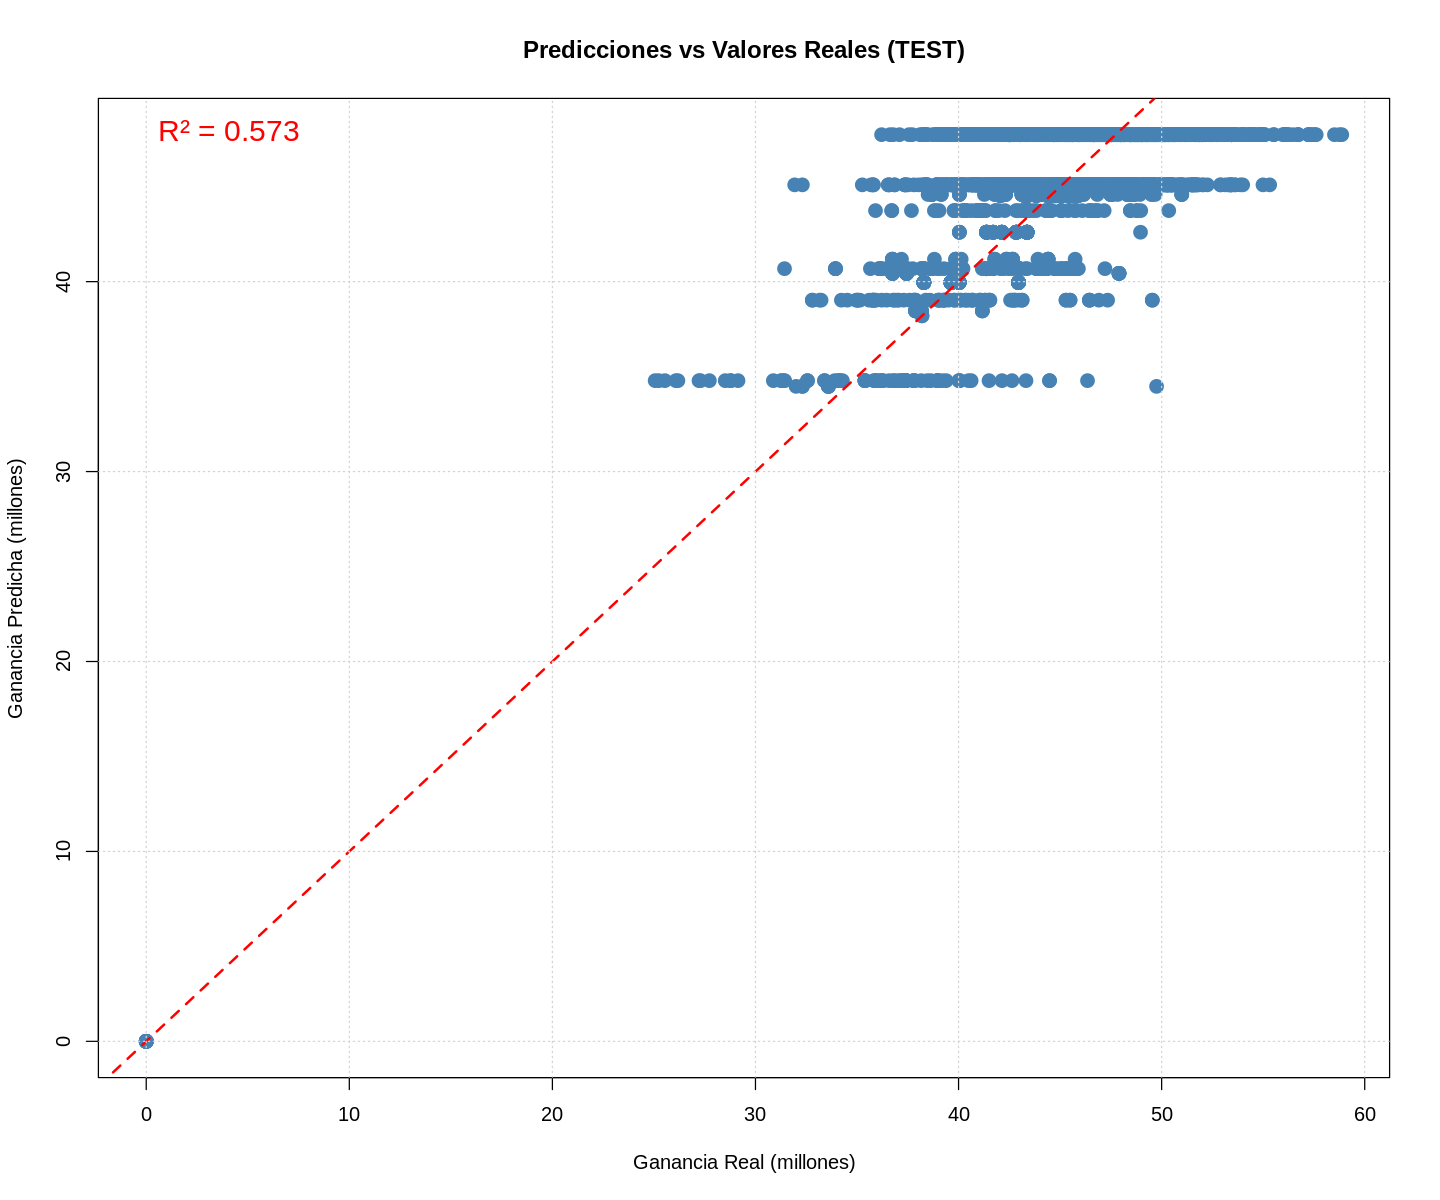

In [3]:
# ============================================
# Árbol de Regresión sobre Grid Search Consolidado
# SIN SEMILLA - Cada corrida genera un árbol diferente
# ============================================

# Limpio la memoria
rm(list=ls(all.names=TRUE))
gc(full=TRUE, verbose=FALSE)

# Cargo las librerías necesarias
require("data.table")
require("rpart")
if (!require("rpart.plot")) install.packages("rpart.plot")
require("rpart.plot")

# Crear directorios si no existen
dir.create("/content/buckets", showWarnings=FALSE, recursive=TRUE)
dir.create("/content/buckets/b1", showWarnings=FALSE, recursive=TRUE)
dir.create("/content/buckets/b1/exp", showWarnings=FALSE, recursive=TRUE)

# Carpeta de trabajo
setwd("/content/buckets/b1/exp")
experimento <- "KA2006_Consolidado_SinSemilla"
dir.create(experimento, showWarnings=FALSE)
setwd(paste0("/content/buckets/b1/exp/", experimento))

# ============================================
# CONFIGURACIÓN
# ============================================

nombre_archivo <- "Consolidado gridsearch final_csv.csv"

cat("============================================\n")
cat("ÁRBOL DE REGRESIÓN - GRID SEARCH CONSOLIDADO\n")
cat("SIN SEMILLA\n")
cat("============================================\n")
cat("Archivo:", nombre_archivo, "\n\n")

# ============================================
# LECTURA DE DATOS
# ============================================

cat("Buscando archivo...\n")

# Buscar el archivo en diferentes ubicaciones
rutas_posibles <- c(
  paste0("/content/buckets/b1/datasets/", nombre_archivo),
  paste0("/content/datasets/", nombre_archivo),
  paste0("/content/drive/MyDrive/labo1/datasets/", nombre_archivo),
  paste0("/content/.drive/My Drive/labo1/datasets/", nombre_archivo),
  paste0("/content/.drive/MyDrive/labo1/datasets/", nombre_archivo)
)

ruta_archivo <- NULL
for (ruta in rutas_posibles) {
  cat("  Probando:", ruta, "... ")
  if (file.exists(ruta)) {
    ruta_archivo <- ruta
    cat("✓ ENCONTRADO\n\n")
    break
  } else {
    cat("✗\n")
  }
}

if (is.null(ruta_archivo)) {
  stop("ERROR: No se encontró el archivo '", nombre_archivo, "'")
}

# Leo el dataset consolidado
dataset <- fread(ruta_archivo)

cat("Dataset leído correctamente desde:\n")
cat("  ", ruta_archivo, "\n\n")
cat("Dimensiones:", nrow(dataset), "filas x", ncol(dataset), "columnas\n")
cat("\nColumnas encontradas:\n")
print(names(dataset))
cat("\nPrimeras filas del dataset:\n")
print(head(dataset))

# Verificar si existe ganancia_test o ganancia_mean
if ("ganancia_test" %in% names(dataset)) {
  col_ganancia <- "ganancia_test"
} else if ("ganancia_mean" %in% names(dataset)) {
  col_ganancia <- "ganancia_mean"
} else {
  cat("\n⚠️  ADVERTENCIA: No se encontró columna de ganancia\n")
  cat("Columnas disponibles:", paste(names(dataset), collapse=", "), "\n")
  stop("Por favor verifica el nombre correcto de la columna de ganancia")
}

cat("\nUsando columna:", col_ganancia, "\n")
cat("\nResumen de", col_ganancia, ":\n")
cat("  Mínimo:  ", format(min(dataset[[col_ganancia]]), big.mark=","), "\n")
cat("  Máximo:  ", format(max(dataset[[col_ganancia]]), big.mark=","), "\n")
cat("  Media:   ", format(mean(dataset[[col_ganancia]]), big.mark=","), "\n")
cat("  Mediana: ", format(median(dataset[[col_ganancia]]), big.mark=","), "\n\n")

# ============================================
# PARTICIÓN TRAIN/TEST
# ============================================

# SIN SEMILLA - cada corrida será diferente
# 70% train, 30% test
n_total <- nrow(dataset)
n_train <- round(0.7 * n_total)

indices_train <- sample(1:n_total, n_train)

dtrain <- dataset[indices_train]
dtest <- dataset[-indices_train]

cat("Partición de datos (SIN SEMILLA):\n")
cat("  Train:", nrow(dtrain), "filas (", round(100*nrow(dtrain)/n_total), "%)\n")
cat("  Test: ", nrow(dtest), "filas (", round(100*nrow(dtest)/n_total), "%)\n\n")

# ============================================
# HIPERPARÁMETROS DEL ÁRBOL
# ============================================

# Parámetros simples para dataset pequeño
param_arbol <- list(
  "cp" = 0.001,
  "minsplit" = 5,
  "minbucket" = 2,
  "maxdepth" = 5
)

cat("Hiperparámetros del árbol:\n")
cat("  cp:        ", param_arbol$cp, "\n")
cat("  minsplit:  ", param_arbol$minsplit, "\n")
cat("  minbucket: ", param_arbol$minbucket, "\n")
cat("  maxdepth:  ", param_arbol$maxdepth, "\n\n")

# ============================================
# ENTRENAMIENTO DEL MODELO
# ============================================

cat("============================================\n")
cat("ENTRENANDO MODELO (SIN SEMILLA)...\n")
cat("============================================\n\n")

# Modelo de regresión: predigo ganancia a partir de hiperparámetros
# Construir fórmula dinámicamente usando la columna detectada
formula_modelo <- as.formula(paste(col_ganancia, "~ cp + maxdepth + minsplit + minbucket"))

modelo <- rpart(
    formula = formula_modelo,
    data = dtrain,
    method = "anova",
    xval = 5,
    control = param_arbol
)

cat("Modelo entrenado!\n\n")

# Información del modelo
print(modelo)

# Importancia de variables
if (!is.null(modelo$variable.importance)) {
  cat("\n\nImportancia de variables:\n")
  print(modelo$variable.importance)
}

# ============================================
# VISUALIZACIÓN DEL ÁRBOL
# ============================================

cat("\n\nGenerando visualización del árbol...\n")

# Configurar tamaño del gráfico
options(repr.plot.width=26, repr.plot.height=18)

# Grafico el árbol
prp(modelo,
    extra = 101,
    digits = 4,
    branch = 1,
    type = 4,
    varlen = 0,
    faclen = 0,
    cex = 0.7,
    cex.main = 1.2,
    box.col = "white",
    border.col = "black",
    main = "Árbol de Regresión: Ganancia según Hiperparámetros (Sin Semilla)"
)

# ============================================
# PREDICCIÓN Y EVALUACIÓN
# ============================================

cat("\n\n============================================\n")
cat("EVALUACIÓN DEL MODELO\n")
cat("============================================\n\n")

# Predicciones en TRAIN
pred_train <- predict(modelo, newdata = dtrain)
dtrain[, pred_ganancia := pred_train]

# Predicciones en TEST
pred_test <- predict(modelo, newdata = dtest)
dtest[, pred_ganancia := pred_test]

# Función para calcular métricas
calcular_metricas <- function(real, pred) {
  mae <- mean(abs(real - pred))
  rmse <- sqrt(mean((real - pred)^2))
  r2 <- cor(real, pred)^2

  list(mae = mae, rmse = rmse, r2 = r2)
}

# Métricas en TRAIN
metricas_train <- calcular_metricas(dtrain[[col_ganancia]], dtrain$pred_ganancia)

cat("TRAIN:\n")
cat("  MAE:  ", format(metricas_train$mae, big.mark=",", digits=2), "\n")
cat("  RMSE: ", format(metricas_train$rmse, big.mark=",", digits=2), "\n")
cat("  R²:   ", round(metricas_train$r2, 4), "\n\n")

# Métricas en TEST
metricas_test <- calcular_metricas(dtest[[col_ganancia]], dtest$pred_ganancia)

cat("TEST:\n")
cat("  MAE:  ", format(metricas_test$mae, big.mark=",", digits=2), "\n")
cat("  RMSE: ", format(metricas_test$rmse, big.mark=",", digits=2), "\n")
cat("  R²:   ", round(metricas_test$r2, 4), "\n\n")

# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================

# Gráfico: Predicciones vs Reales en TEST
options(repr.plot.width=12, repr.plot.height=10)

plot(dtest[[col_ganancia]] / 1e6, dtest$pred_ganancia / 1e6,
     xlab = "Ganancia Real (millones)",
     ylab = "Ganancia Predicha (millones)",
     main = "Predicciones vs Valores Reales (TEST)",
     pch = 19,
     col = "steelblue",
     cex = 1.5)
abline(0, 1, col = "red", lwd = 2, lty = 2)
grid()

text(x = min(dtest[[col_ganancia]])/1e6,
     y = max(dtest$pred_ganancia)/1e6,
     labels = paste0("R² = ", round(metricas_test$r2, 3)),
     pos = 4, cex = 1.5, col = "red")

# ============================================
# ANÁLISIS DE MEJORES CONFIGURACIONES
# ============================================

cat("\n============================================\n")
cat("ANÁLISIS DE CONFIGURACIONES\n")
cat("============================================\n\n")

# TOP 10 configuraciones reales
cat("TOP 10 MEJORES (datos reales):\n")
# Ordenar por la columna de ganancia detectada
setorderv(dataset, col_ganancia, order = -1)
top10_real <- dataset[1:10]
print(top10_real)

cat("\n\n============================================\n")
cat("¡ANÁLISIS COMPLETADO!\n")
cat("Cada vez que corras este código obtendrás\n")
cat("una partición train/test diferente y\n")
cat("potencialmente un árbol diferente.\n")
cat("============================================\n")